In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.isnull().values.any()

False

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


(array([ 12.,  37.,  86., 104., 148., 201., 175., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

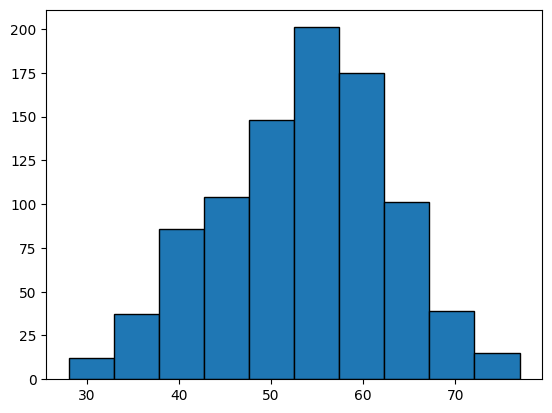

In [5]:
plt.hist(df.Age, edgecolor = 'black')

<Axes: ylabel='Frequency'>

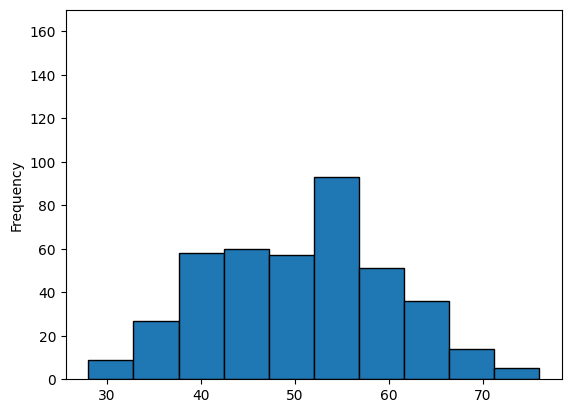

In [6]:
df[df['HeartDisease']==0]['Age'].plot.hist(edgecolor = 'black', grid = False, ylim = (0, 170))

<Axes: ylabel='Frequency'>

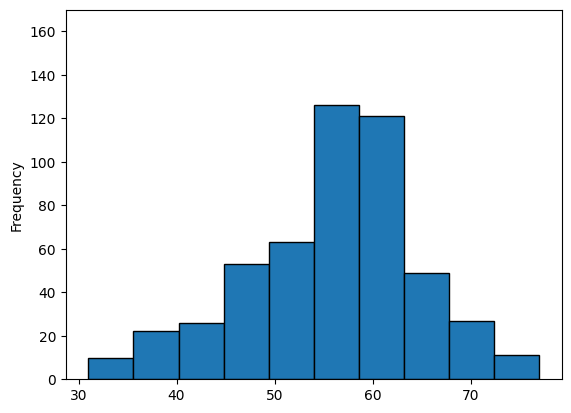

In [7]:
df[df['HeartDisease']==1]['Age'].plot.hist(edgecolor = 'black', grid = False, ylim = (0, 170))

In [8]:
df.groupby('HeartDisease')['Age'].mean()

HeartDisease
0    50.551220
1    55.899606
Name: Age, dtype: float64

<Axes: xlabel='HeartDisease', ylabel='count'>

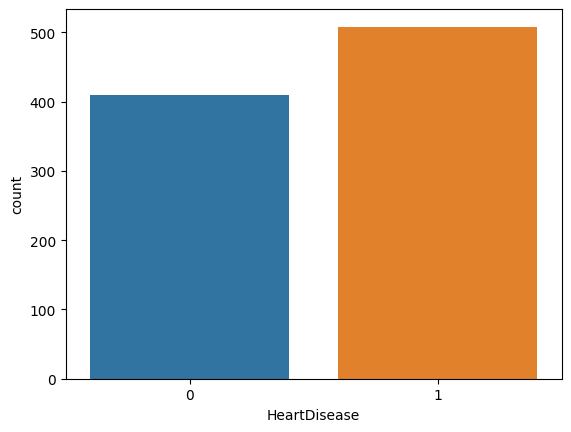

In [9]:
sns.countplot(x = df['HeartDisease'], data = df)

<Axes: xlabel='Sex', ylabel='count'>

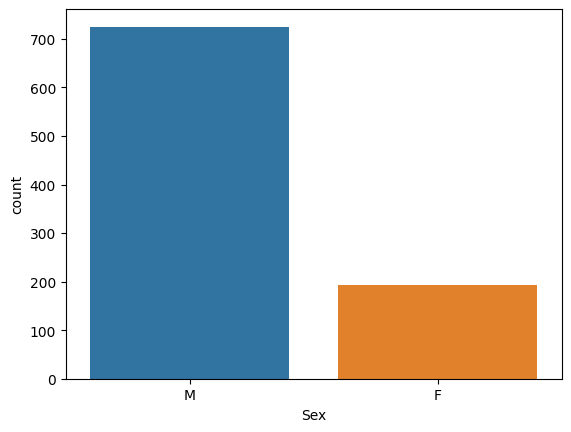

In [10]:
sns.countplot(x = df['Sex'], data = df)

<Axes: xlabel='HeartDisease', ylabel='count'>

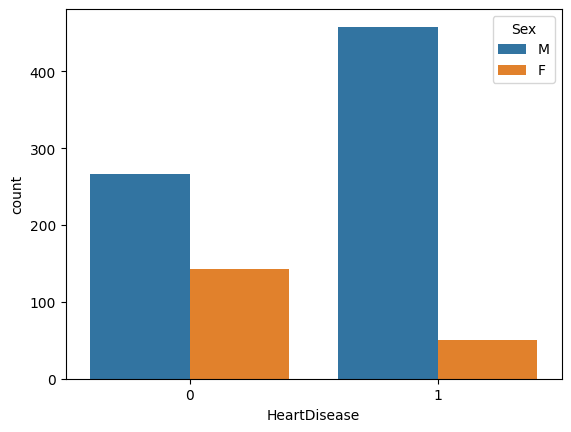

In [11]:
sns.countplot(x=df['HeartDisease'], hue = df['Sex'], data = df)

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

<Axes: xlabel='ChestPainType', ylabel='count'>

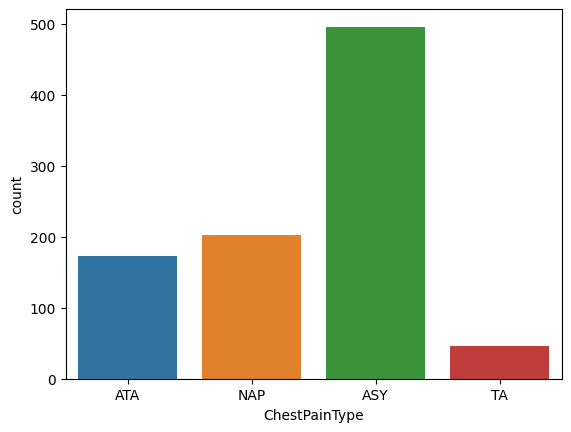

In [14]:
sns.countplot(x = df.ChestPainType, data = df)

<Axes: xlabel='HeartDisease', ylabel='count'>

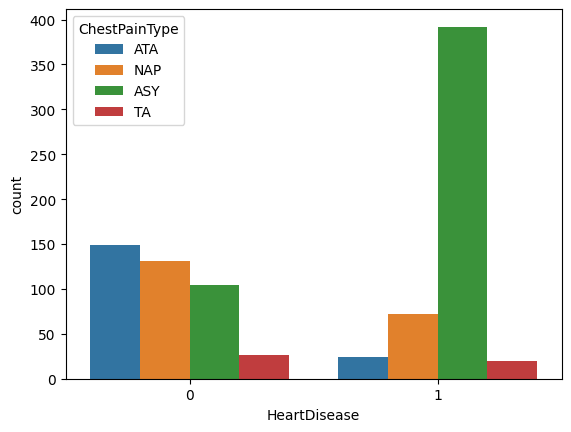

In [15]:
sns.countplot(x = df['HeartDisease'], hue = df['ChestPainType'], data = df)

Text(0, 0.5, 'Frequency')

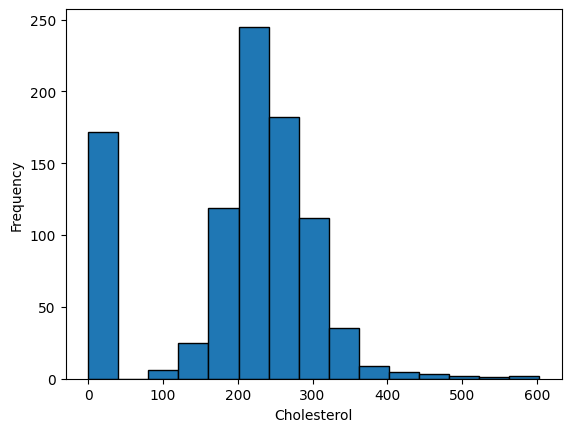

In [16]:
plt.hist(df.Cholesterol, edgecolor = 'black', bins = 15)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

In [17]:
#Good amount of null values, not too much to delete cholesterol column, delete null rows

df = df[df['Cholesterol']!=0]
df.Cholesterol.min()

85

(array([  6.,  16.,  81., 193., 175., 149.,  74.,  30.,   9.,   5.,   1.,
          3.,   2.,   1.,   1.]),
 array([ 85.        , 119.53333333, 154.06666667, 188.6       ,
        223.13333333, 257.66666667, 292.2       , 326.73333333,
        361.26666667, 395.8       , 430.33333333, 464.86666667,
        499.4       , 533.93333333, 568.46666667, 603.        ]),
 <BarContainer object of 15 artists>)

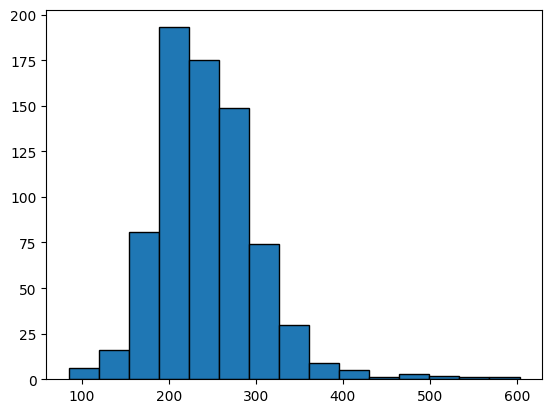

In [18]:
plt.hist(df.Cholesterol, edgecolor = 'black', bins = 15)

Text(0.5, 0, 'Cholesterol')

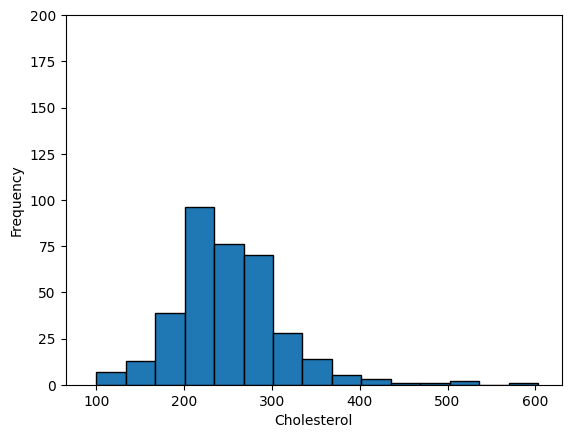

In [19]:
df[df['HeartDisease'] == 1]['Cholesterol'].plot.hist(bins = 15, edgecolor = 'black', grid = False, ylim = (0,200), xlim = (65,630))
plt.xlabel('Cholesterol')

Text(0.5, 0, 'Cholesterol')

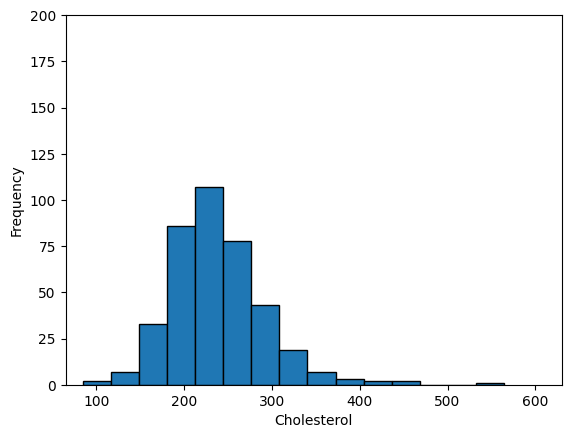

In [20]:
df[df['HeartDisease'] == 0]['Cholesterol'].plot.hist(bins = 15, edgecolor = 'black', grid = False, ylim = (0,200), xlim = (65,630))
plt.xlabel('Cholesterol')

In [21]:
print(df.groupby('HeartDisease')['Cholesterol'].mean())
print(df.groupby('HeartDisease')['Cholesterol'].median())

HeartDisease
0    238.769231
1    251.061798
Name: Cholesterol, dtype: float64
HeartDisease
0    231.5
1    246.0
Name: Cholesterol, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fae52b3bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae52b701c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae52b3baf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae52b70730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae52b709d0>],
 'means': []}

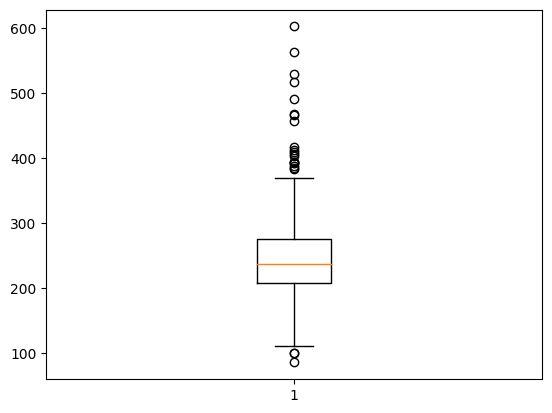

In [22]:
plt.boxplot(df.Cholesterol)

In [23]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Text(0, 0.5, 'Frequency')

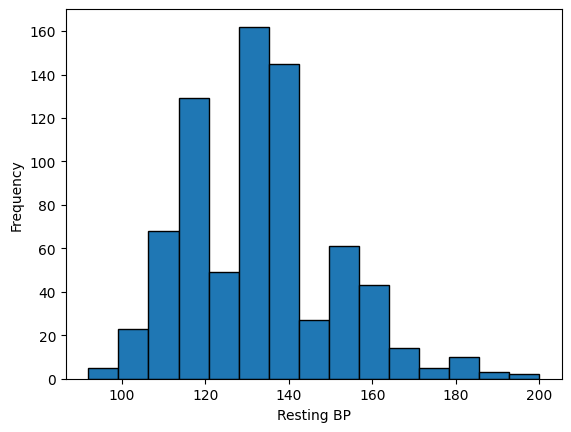

In [24]:
plt.hist(df['RestingBP'], edgecolor = 'black', bins = 15)
plt.xlabel('Resting BP')
plt.ylabel('Frequency')

<Axes: ylabel='Frequency'>

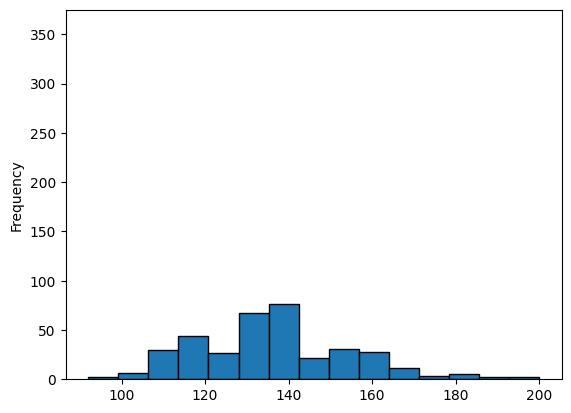

In [25]:
df[df['HeartDisease']==1]['RestingBP'].plot.hist(edgecolor = 'black', bins = 15, ylim = (0,375))

<Axes: ylabel='Frequency'>

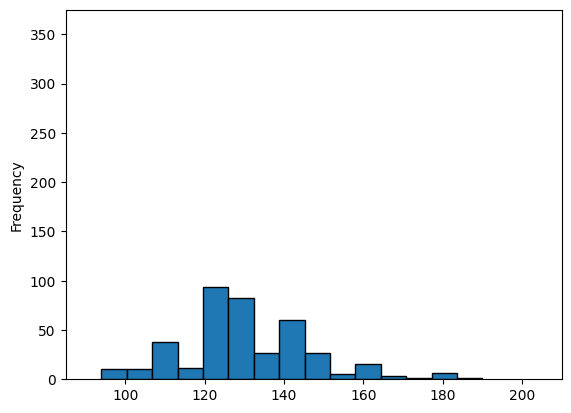

In [26]:
df[df['HeartDisease']==0]['RestingBP'].plot.hist(edgecolor = 'black', bins = 15, ylim = (0,375), xlim = (85,210))

In [27]:
print(df.groupby('HeartDisease')['RestingBP'].mean())
print(df.groupby('HeartDisease')['RestingBP'].median())

HeartDisease
0    130.164103
1    136.154494
Name: RestingBP, dtype: float64
HeartDisease
0    130.0
1    136.0
Name: RestingBP, dtype: float64


Text(0, 0.5, 'Resting Blood Pressure')

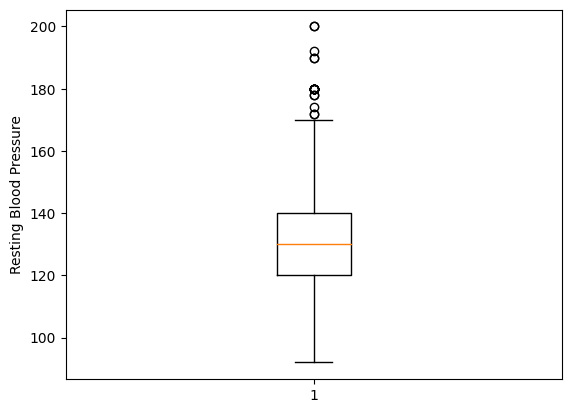

In [28]:
plt.boxplot(df.RestingBP)
plt.ylabel('Resting Blood Pressure')

In [29]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


(array([621.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

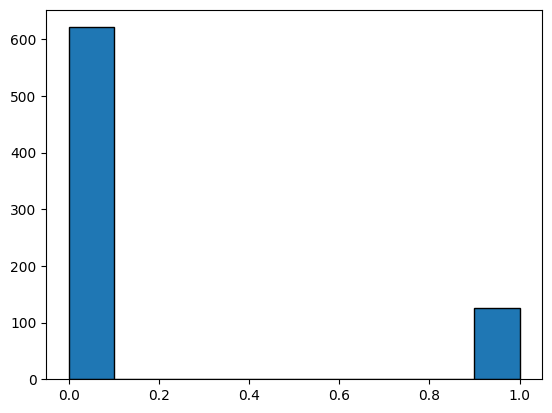

In [30]:
plt.hist(df['FastingBS'], edgecolor = 'black')

In [31]:
#Too many null values for fasting blood sugar, drop column
df.drop(['FastingBS'], axis = 'columns', inplace = True)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


In [33]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

<Axes: xlabel='RestingECG', ylabel='count'>

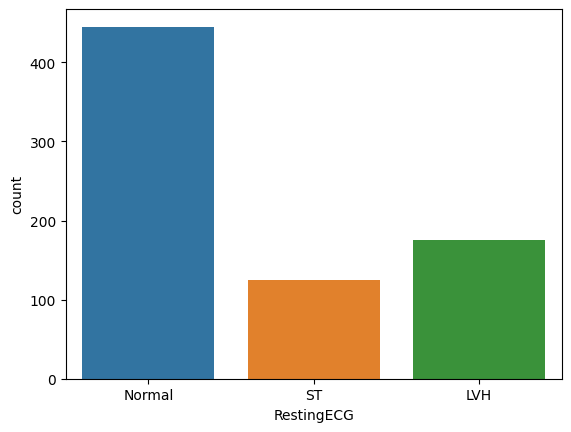

In [34]:
sns.countplot(x = df.RestingECG, data = df)

<Axes: xlabel='HeartDisease', ylabel='count'>

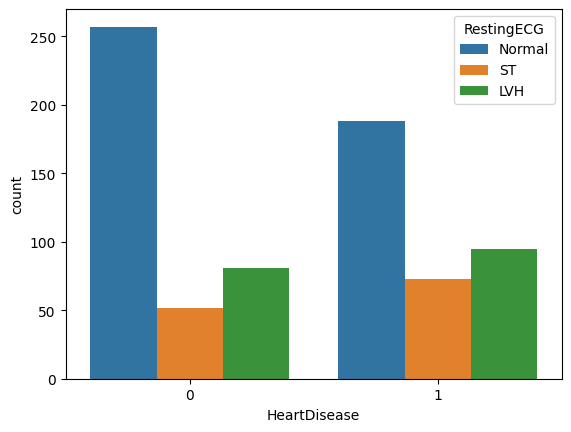

In [35]:
sns.countplot(x=df['HeartDisease'], hue = df['RestingECG'], data = df)

In [36]:
df.groupby(['HeartDisease', 'RestingECG']).size()

HeartDisease  RestingECG
0             LVH            81
              Normal        257
              ST             52
1             LVH            95
              Normal        188
              ST             73
dtype: int64

In [37]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


(array([  5.,  18.,  53., 115., 121., 133., 154.,  99.,  42.,   6.]),
 array([ 69. ,  82.3,  95.6, 108.9, 122.2, 135.5, 148.8, 162.1, 175.4,
        188.7, 202. ]),
 <BarContainer object of 10 artists>)

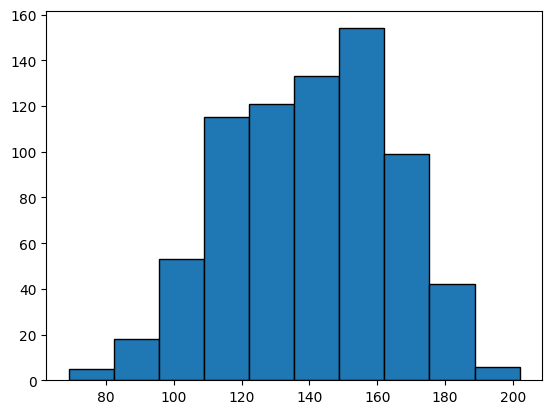

In [38]:
plt.hist(df.MaxHR, edgecolor = 'black')

<Axes: ylabel='Frequency'>

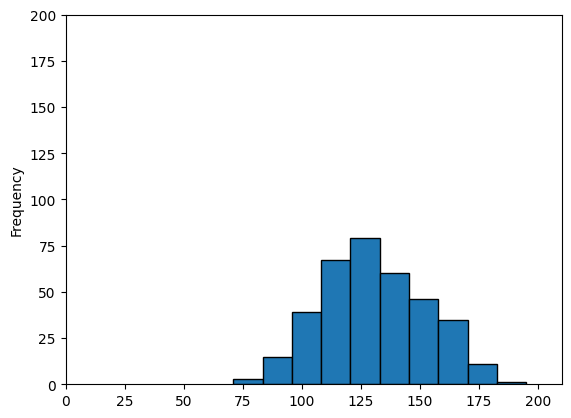

In [39]:
df[df['HeartDisease']==1]['MaxHR'].plot.hist(edgecolor = 'black', ylim = (0,200), xlim = (0,210))

<Axes: ylabel='Frequency'>

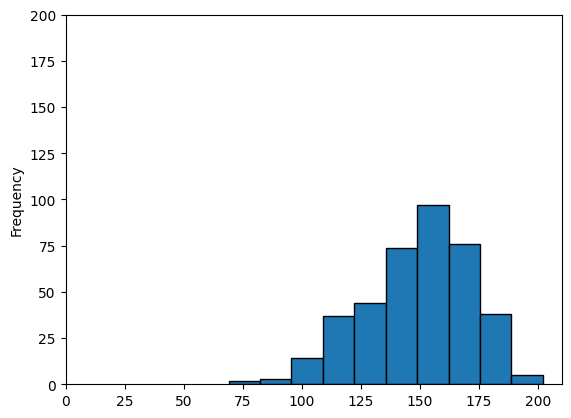

In [40]:
df[df['HeartDisease']==0]['MaxHR'].plot.hist(edgecolor = 'black', ylim = (0,200), xlim = (0,210))

In [41]:
print(df.groupby('HeartDisease')['MaxHR'].mean())
print(df.groupby('HeartDisease')['MaxHR'].median())

HeartDisease
0    149.058974
1    130.550562
Name: MaxHR, dtype: float64
HeartDisease
0    150.5
1    130.0
Name: MaxHR, dtype: float64


In [42]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


<Axes: xlabel='ExerciseAngina', ylabel='count'>

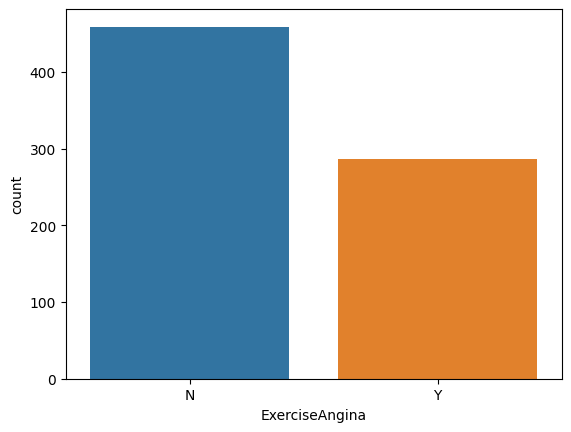

In [43]:
sns.countplot(x = df.ExerciseAngina, data = df)

<Axes: xlabel='HeartDisease', ylabel='count'>

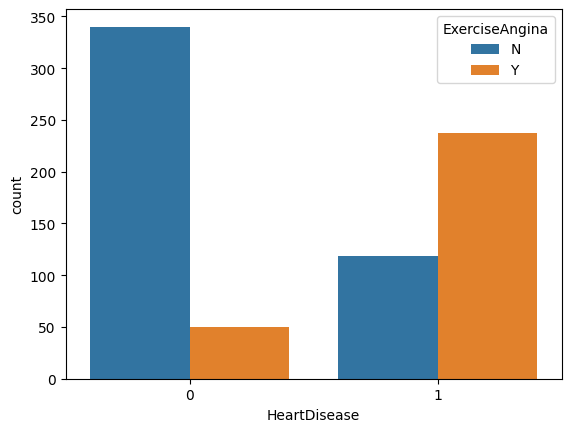

In [44]:
sns.countplot(x = df.HeartDisease, hue = df.ExerciseAngina, data = df)

In [45]:
df.groupby(['HeartDisease', 'ExerciseAngina']).size()

HeartDisease  ExerciseAngina
0             N                 340
              Y                  50
1             N                 119
              Y                 237
dtype: int64

In [46]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


Text(0, 0.5, 'Frequency')

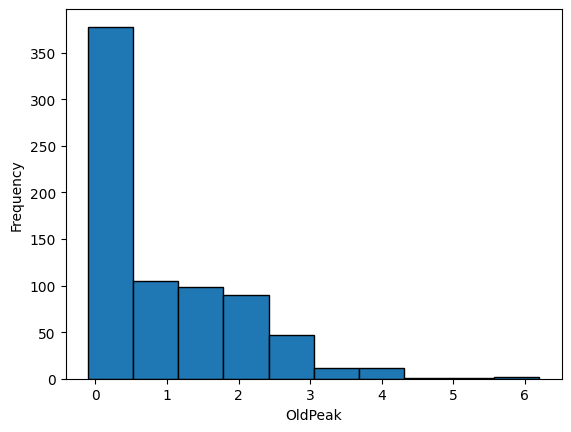

In [47]:
plt.hist(df.Oldpeak, edgecolor = 'black')
plt.xlabel('OldPeak')
plt.ylabel('Frequency')

<Axes: ylabel='Frequency'>

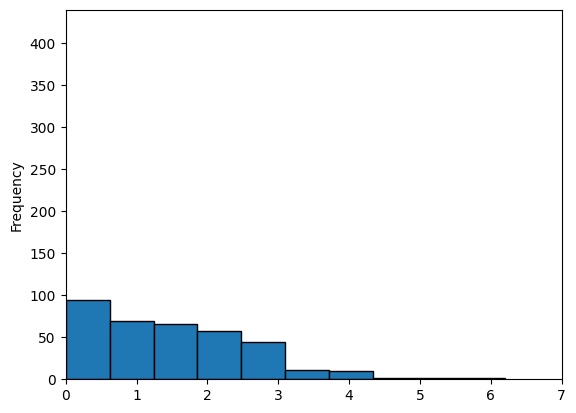

In [48]:
df[df['HeartDisease']==1]['Oldpeak'].plot.hist(edgecolor = 'black', ylim = (0, 440), xlim = (0,7))

<Axes: ylabel='Frequency'>

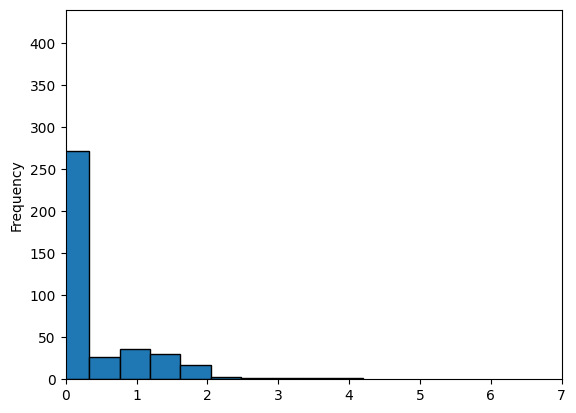

In [49]:
df[df['HeartDisease']==0]['Oldpeak'].plot.hist(edgecolor = 'black', ylim = (0, 440), xlim = (0,7))

In [50]:
print(df.groupby('HeartDisease')['Oldpeak'].mean())
print(df.groupby('HeartDisease')['Oldpeak'].median())

HeartDisease
0    0.393846
1    1.457865
Name: Oldpeak, dtype: float64
HeartDisease
0    0.0
1    1.5
Name: Oldpeak, dtype: float64


In [51]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


In [52]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

<Axes: xlabel='ST_Slope', ylabel='count'>

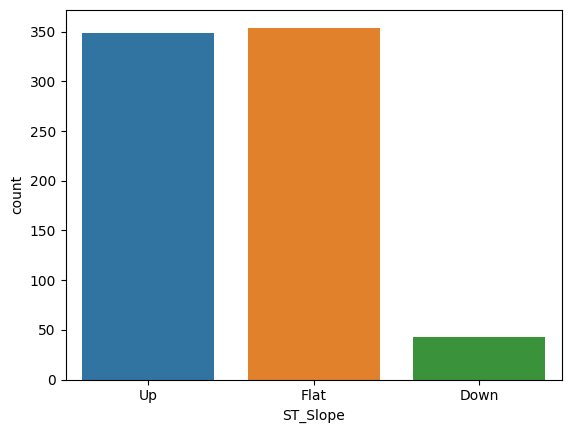

In [53]:
sns.countplot(x = df.ST_Slope, data = df)

<Axes: xlabel='HeartDisease', ylabel='count'>

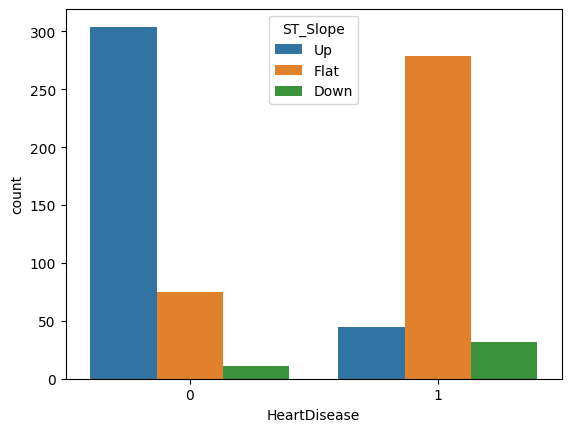

In [54]:
sns.countplot(x = df.HeartDisease, hue = df.ST_Slope, data = df)

In [55]:
df.groupby(['HeartDisease', 'ST_Slope']).size()

HeartDisease  ST_Slope
0             Down         11
              Flat         75
              Up          304
1             Down         32
              Flat        279
              Up           45
dtype: int64

In [56]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


In [57]:
df.Sex = df['Sex'].replace({
    'F':0, 
    'M':1
})

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,Normal,122,N,0.0,Up,0


In [58]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [59]:
df.ChestPainType = df['ChestPainType'].replace({
    'ASY':0,
    'NAP':1, 
    'TA':2, 
    'ATA':3
})

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,Normal,172,N,0.0,Up,0
1,49,0,1,160,180,Normal,156,N,1.0,Flat,1
2,37,1,3,130,283,ST,98,N,0.0,Up,0
3,48,0,0,138,214,Normal,108,Y,1.5,Flat,1
4,54,1,1,150,195,Normal,122,N,0.0,Up,0


In [60]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [61]:
df.RestingECG = df['RestingECG'].replace({
    'Normal':0, 
    'ST':1, 
    'LVH':2
})

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,172,N,0.0,Up,0
1,49,0,1,160,180,0,156,N,1.0,Flat,1
2,37,1,3,130,283,1,98,N,0.0,Up,0
3,48,0,0,138,214,0,108,Y,1.5,Flat,1
4,54,1,1,150,195,0,122,N,0.0,Up,0


In [62]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [63]:
df.ExerciseAngina = df['ExerciseAngina'].replace({
    'N':0, 
    'Y':1
})

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,172,0,0.0,Up,0
1,49,0,1,160,180,0,156,0,1.0,Flat,1
2,37,1,3,130,283,1,98,0,0.0,Up,0
3,48,0,0,138,214,0,108,1,1.5,Flat,1
4,54,1,1,150,195,0,122,0,0.0,Up,0


In [64]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [65]:
df.ST_Slope = df['ST_Slope'].replace({
    'Down':0, 
    'Flat':1, 
    'Up':2
})

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,172,0,0.0,2,0
1,49,0,1,160,180,0,156,0,1.0,1,1
2,37,1,3,130,283,1,98,0,0.0,2,0
3,48,0,0,138,214,0,108,1,1.5,1,1
4,54,1,1,150,195,0,122,0,0.0,2,0


In [66]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,0.756032,1.004021,133.022788,244.635389,0.639410,140.226542,0.384718,0.901609,1.410188,0.477212
std,9.505888,0.429762,1.201223,17.282750,59.153524,0.838664,24.524107,0.486855,1.072861,0.598076,0.499816
min,28.000000,0.000000,0.000000,92.000000,85.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,1.000000,0.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,237.000000,0.000000,140.000000,0.000000,0.500000,1.000000,0.000000
75%,59.000000,1.000000,2.000000,140.000000,275.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [67]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,172,0,0.0,2,0
1,49,0,1,160,180,0,156,0,1.0,1,1
2,37,1,3,130,283,1,98,0,0.0,2,0
3,48,0,0,138,214,0,108,1,1.5,1,1
4,54,1,1,150,195,0,122,0,0.0,2,0


In [68]:
stats.ttest_ind(df[df['HeartDisease']==0]['Age'], df[df['HeartDisease']==1]['Age'])

Ttest_indResult(statistic=-8.534583526140043, pvalue=7.861071765822652e-17)

In [69]:
Sex_HeartDisease = pd.crosstab(df['Sex'], df['HeartDisease'])

stats.chi2_contingency(Sex_HeartDisease)

(62.58908315427757,
 2.5466116402861134e-15,
 1,
 array([[ 95.14745308,  86.85254692],
        [294.85254692, 269.14745308]]))

In [70]:
ChestPainType_HeartDisease = pd.crosstab(df['ChestPainType'], df['HeartDisease'])

stats.chi2_contingency(ChestPainType_HeartDisease)

(215.19039576001538,
 2.1996576286739653e-46,
 3,
 array([[193.43163539, 176.56836461],
        [ 88.35120643,  80.64879357],
        [ 21.43431635,  19.56568365],
        [ 86.78284182,  79.21715818]]))

In [71]:
stats.ttest_ind(df[df['HeartDisease']==0]['RestingBP'], df[df['HeartDisease']==1]['RestingBP'])

Ttest_indResult(statistic=-4.797948381901695, pvalue=1.937383624038573e-06)

In [72]:
stats.ttest_ind(df[df['HeartDisease']==0]['Cholesterol'], df[df['HeartDisease']==1]['Cholesterol'])

Ttest_indResult(statistic=-2.8484821957405964, pvalue=0.004514069106741928)

In [73]:
RestingECG_HeartDisease = pd.crosstab(df['RestingECG'], df['HeartDisease'])

stats.chi2_contingency(RestingECG_HeartDisease)

(13.81962115325023,
 0.0009979468130349512,
 2,
 array([[232.64075067, 212.35924933],
        [ 65.34852547,  59.65147453],
        [ 92.01072386,  83.98927614]]))

In [74]:
stats.ttest_ind(df[df['HeartDisease']==0]['MaxHR'], df[df['HeartDisease']==1]['MaxHR'])

Ttest_indResult(statistic=11.109683995346739, pvalue=1.226926008136061e-26)

In [75]:
ExerciseAngina_HeartDisease = pd.crosstab(df['ExerciseAngina'], df['HeartDisease'])

stats.chi2_contingency(ExerciseAngina_HeartDisease)

(224.90775965021905,
 7.690036188894029e-51,
 1,
 array([[239.95978552, 219.04021448],
        [150.04021448, 136.95978552]]))

In [76]:
stats.ttest_ind(df[df['HeartDisease']==0]['Oldpeak'], df[df['HeartDisease']==1]['Oldpeak'])

Ttest_indResult(statistic=-15.568053154347314, pvalue=1.6302939711725474e-47)

In [77]:
STslope_HeartDisease = pd.crosstab(df['ST_Slope'], df['HeartDisease'])

stats.chi2_contingency(STslope_HeartDisease)

(319.13762270357586,
 5.013554566295527e-70,
 2,
 array([[ 22.47989276,  20.52010724],
        [185.06702413, 168.93297587],
        [182.45308311, 166.54691689]]))

In [78]:
#Association between all remaining features and target(heart disease) is significant, will keep for model buildingb

In [79]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,172,0,0.0,2,0
1,49,0,1,160,180,0,156,0,1.0,1,1
2,37,1,3,130,283,1,98,0,0.0,2,0
3,48,0,0,138,214,0,108,1,1.5,1,1
4,54,1,1,150,195,0,122,0,0.0,2,0


In [80]:
X = df.drop(['HeartDisease'], axis='columns')
y = df.HeartDisease

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [82]:
model_params = {
    'logistic_regression':{
        'model':LogisticRegression(max_iter=1000), 
        'params':{
            
        }
    }, 
    'decision_tree':{
        'model':DecisionTreeClassifier(), 
        'params':{
            
        }
    }, 
    'random_forest':{
        'model':RandomForestClassifier(), 
        'params':{
            'n_estimators':[50, 100, 120]
        }
    }, 
    'svc':{
        'model':SVC(gamma = 'auto'), 
        'params':{
            'kernel':['rbf', 'linear'], 
            'C':[1,5,10]
        }
    }, 
    'bernoulli_NB':{
        'model':BernoulliNB(), 
        'params':{
            
        }
    } 
}

In [83]:
for model, params in model_params.items():
    print(model)
    print(params)

logistic_regression
{'model': LogisticRegression(max_iter=1000), 'params': {}}
decision_tree
{'model': DecisionTreeClassifier(), 'params': {}}
random_forest
{'model': RandomForestClassifier(), 'params': {'n_estimators': [50, 100, 120]}}
svc
{'model': SVC(gamma='auto'), 'params': {'kernel': ['rbf', 'linear'], 'C': [1, 5, 10]}}
bernoulli_NB
{'model': BernoulliNB(), 'params': {}}


In [84]:
scores = []

for model, params in model_params.items():
    clf = GridSearchCV(params['model'], params['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model':params['model'], 
        'best_score':clf.best_score_, 
        'best_params':clf.best_params_
    })

In [86]:
scores

[{'model': LogisticRegression(max_iter=1000),
  'best_score': 0.8364742729306489,
  'best_params': {}},
 {'model': DecisionTreeClassifier(),
  'best_score': 0.7694049217002237,
  'best_params': {}},
 {'model': RandomForestClassifier(),
  'best_score': 0.863221476510067,
  'best_params': {'n_estimators': 120}},
 {'model': SVC(gamma='auto'),
  'best_score': 0.8404653243847875,
  'best_params': {'C': 10, 'kernel': 'linear'}},
 {'model': BernoulliNB(), 'best_score': 0.7935480984340044, 'best_params': {}}]